In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
%matplotlib inline
#costume classes
from nexus_ai.sentence_sentiment_analysis.preprocessing import tokenize_data

In [52]:
#loading the data
# with open('yelp_academic_dataset_review.json', encoding='utf-8') as f:
#     df_review = pd.DataFrame(json.loads(line) for line in f)
df_reviews = pd.read_json('dataset/googlemaps_sample_dataset.json')
df_reviews.head(5)

,source,rating,date,text,username
0,Google Maps,3,2 days ago,Visited the place for 3 times\nNo consistency ...,basem ibrahim
1,Google Maps,5,2 years ago,Always one for trying something new and as we ...,Tony McReynolds
2,Google Maps,3,3 years ago,"A nice place for a drink, coffee is alright, n...",AbdulAziz Al Hindi
3,Google Maps,5,a year ago,I like the taste of the cold coffee named (DUL...,Dr/A Al-Kfiri
4,Google Maps,5,a year ago,Nice menu specially after the lockdown. Having...,Hanea Rezk


In [53]:
df_reviews.drop(['source', 'date', 'username'], axis=1, inplace=True)

In [54]:
df_reviews.shape

(2550, 2)

<AxesSubplot:ylabel='Frequency'>

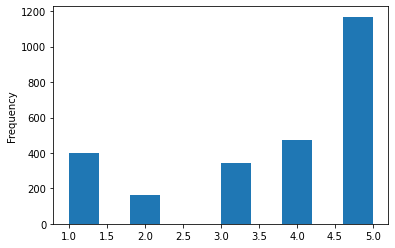

In [55]:
#plotting the rating distrubution
figure = plt.figure()

axes = figure.add_subplot(1, 1, 1)
axes.set_ylabel('Frequancy')

# df_review['stars'].plot.hist()
df_reviews['rating'].plot.hist()

In [56]:
# converting rating to (Positive/Negative/Neutral) into a new cloumn called stars
stars_mapping = {
    5.0: 'Positive', 4.5: 'Positive', 4.0: 'Positive',
    3.5:'Neutral', 3.0:'Neutral', 2.5:'Neutral',
    2.0:'Negative', 1.5:'Negative', 1.0:'Negative', 0.5:'Negative'
    }
df_reviews['polarity'] = df_reviews['rating'].map(stars_mapping)
df_reviews.dropna(axis=0, inplace=True)
df_reviews.head(5)

,rating,text,polarity
0,3,Visited the place for 3 times\nNo consistency ...,Neutral
1,5,Always one for trying something new and as we ...,Positive
2,3,"A nice place for a drink, coffee is alright, n...",Neutral
3,5,I like the taste of the cold coffee named (DUL...,Positive
4,5,Nice menu specially after the lockdown. Having...,Positive


<BarContainer object of 3 artists>

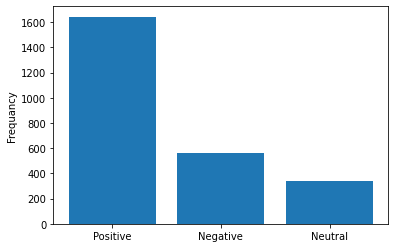

In [57]:
# plotting the pos/neg/neu distrubution
plt.figure()

plt.ylabel('Frequancy')

counts = pd.DataFrame(df_reviews['polarity'].value_counts())
plt.bar(counts.index, counts['polarity'])

In [58]:
df_reviews

,rating,text,polarity
0,3,Visited the place for 3 times\nNo consistency ...,Neutral
1,5,Always one for trying something new and as we ...,Positive
2,3,"A nice place for a drink, coffee is alright, n...",Neutral
3,5,I like the taste of the cold coffee named (DUL...,Positive
4,5,Nice menu specially after the lockdown. Having...,Positive
...,...,...,...
2545,5,,Positive
2546,4,,Positive
2547,5,,Positive
2548,1,,Negative


In [59]:
# remove google translation
df_reviews['text'] = df_reviews['text'].str.replace("(translated by google)", '', regex=False)
df_reviews['text'] = df_reviews['text'].str.replace("(original)", '%*?<>!', regex=False)
# split each review into before and after the original
df_reviews['text'] = df_reviews['text'].str.partition('%*?<>!', expand=False)
# take the text before the original (the translated review)
print(df_reviews['text'].tolist()[:10])
df_reviews['text'] = df_reviews['text'].apply(lambda x: x[2])

# after removing the google translation remove outliers (zreo length reviews)
lengths = df_reviews['text'].apply(lambda x: len(x))
zero_idx = df_reviews[lengths == 0].index
df_reviews.drop(zero_idx, axis=0, inplace=True)

[("Visited the place for 3 times\nNo consistency of coffee taste . I belive it's due to the temperature of coffee &milk …", '', ''), ('Always one for trying something new and as we finished our wonderful evening meal we stepped in to Dose for the first time. Wonderful decorations, atmosphere and music just at the right level. One area I feel people think they can save …', '', ''), ('A nice place for a drink, coffee is alright, nothing special, but the decor is beautiful and the ambiance is great, with classics playing in the background, chairs are not very comfortable though. I hated the long line, I ordered the red …', '', ''), ('I like the taste of the cold coffee named (DULCE DE LECHE)\nIts not the first time i try it and its not gonna be the last time and im gonna taste another option from their list . Order didn’t take long time to be done …', '', ''), ('Nice menu specially after the lockdown. Having different sizes. Very good staff & quick service. Welcome back to dose after lock

In [60]:
df_reviews

,rating,text,polarity


In [ ]:
# remove non english reviews
lambda_ = lambda x: x if detect(x) == 'ar' else None
for i in range(len(df_reviews)):
    if(len(df_reviews.iloc[i, 0]) > 40):
        try:
            df_reviews.iloc[i, 0] = lambda_(df_reviews.iloc[i, 0])
        # if the number of words in the text is shorter than 10 LangDetect would raise an exception
        # or if the text contain only numbers/symbols
        except LangDetectException:
            pass
none_value = df_reviews[df_reviews['text'].isnull()].index
df_reviews.drop(none_value, axis=0, inplace=True)

,text,rating,stars,lengths
0,Stopped off here as we were looking for somewh...,3,1,109
1,What a great restaurant. We went to go see the...,5,1,54
2,"Boy, am I glad I got to try Da Marino before t...",5,1,205
3,We found this gem during our mini trip to expe...,5,1,146
4,Donna the bartender is amazing. She is a hard ...,5,1,32
...,...,...,...,...
26628,They have really a good burger using a good qu...,3,1,19
26629,High price .. bad food tast and quality ..heav...,1,0,20
26630,This was a nice sit down restaurant with food ...,2,0,213
26631,"I went for a dinner Sunday, reservation at 7:0...",1,0,235


In [37]:
#sorting the values by the label so that the positive (1)
# df_review = df_review.sort_values(by=['stars', 'lengths'], ascending=[False, False])
# df_review = df_review.sort_values(by='stars', ascending=False)
# df_review

In [ ]:
# a test to balance the reviews in a dataframe
# def balance_distrubution(df, pos_percentage = 0.5):
#     if df['stars'].sum(axis=0)/len(df) < pos_percentage:
#         print('positive percentage is already below {}%'.format(pos_percentage*100))
#         return
    
#     df = df.reset_index(drop=True) 
#     #taking an estimation of 1% if the total length of the dataframe
#     step = int(len(df)/100)
    
#     for i in range(0, df.shape[0], step):
#         #dropping the amount of step of entries until the pos_percentage reaches 1% obave it
#         #so that no more data than required would be deleted
#         if (df['stars'].sum(axis=0)/len(df)) > (pos_percentage+0.02):
#             df.drop(df.index[0:step], axis=0, inplace=True)
#             df = df.reset_index(drop=True)
#             print(df['stars'].sum(axis=0)/len(df))
#         elif (df['stars'].sum(axis=0)/len(df)) > pos_percentage:
#             #taking an estimation of the remaining data and dropping them
#             #taking the positive reviews from the end to get rid of very short reviews
#             remaining_data = int(((df['stars'].sum(axis=0)/len(df)) - pos_percentage) * len(df))
#             postive_last_index = int(len(df)/2)-remaining_data
#             df.drop(df.index[postive_last_index-remaining_data:postive_last_index], axis=0, inplace=True)
#             df = df.reset_index(drop=True)  
#             print(df['stars'].sum(axis=0)/len(df))
#             #dropping entries one by one until it reaches pos_percentage 
#             for i in range(df.shape[0]):
#                 if (df['stars'].sum(axis=0)/len(df)) > pos_percentage:
#                     df.drop(df.index[0], axis=0, inplace=True)
#                     df = df.reset_index(drop=True)
#                     print(df['stars'].sum(axis=0)/len(df))
#                 else:
#                     break        
#         elif (df['stars'].sum(axis=0)/len(df)) == pos_percentage:        
#             return df
        
#         else:
#             raise Exception()

In [ ]:
balance_distrubution(df_reviews, pos_percentage=0.95)

positive percentage is already below 95.0%


In [ ]:
df_review = balance_distrubution(df_reviews, pos_percentage=0.5)

0.9057154776804339
0.9047546071031761
0.9037739500677375
0.9027728890453284
0.9017507805398569
0.9007069537085114
0.8996407088934641
0.8985513160579474
0.8974380131193531
0.8963000041713595
0.8951364575863668
0.8939465039887377
0.8927292340884574
0.8914836963638745
0.8902088945811067
0.8889037851365241
0.8875672742074081
0.886198214694438
0.8847954029380416
0.8833575751888518
0.8818834038105193
0.8803714931908956
0.8788203753351207
0.8772285051113635
0.8755942551168493
0.8739159101283157
0.8721916610971159
0.8704195986447746
0.8685977060098314
0.8667238513911971
0.8647957796269103
0.8628111031400033
0.860767292075049
0.8586616635397123
0.8564913698551059
0.8542533857067479
0.8519444940742065
0.8495612708018154
0.8471000676548374
0.844556993684737
0.8419278947033764
0.8392083306383804
0.8363935505100362
0.8334784647330699
0.8304576144036009
0.8273251371813573
0.8240747293185195
0.8206996033177064
0.8171924406206339
0.8135453386334658
0.809749751281855
0.8057964221545192
0.80167530913442

In [ ]:
#making sure the dataframe has been modified and to see the amount of data lost
#original number of rows is 26633 
print(df_review.shape)
print(f'the number of entries lost: {26633-df_review.shape[0]}')

(4972, 4)
the number of entries lost: 21661


<BarContainer object of 2 artists>

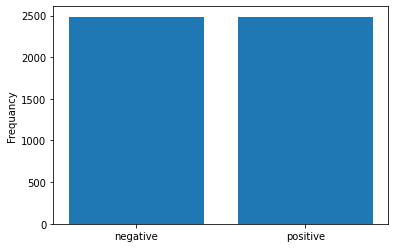

In [ ]:
#plot to make sure the distrubution is the balanced
plt.figure()

plt.ylabel('Frequancy')
plt.xticks([1, 0],['positive','negative'])

plt.bar([1, 0],df_review['stars'].value_counts())

In [ ]:
df_review

,text,rating,stars,lengths
0,I was extremely impressed by Mohamed Ali Taala...,5,1,37
1,"Very nice food, very nice service especially A...",5,1,19
2,Nisce service from ABHISHEK and delicious food...,5,1,30
3,Thank you so much for good delicious food and ...,5,1,20
4,"Superb venue, very friendly, welcoming, and ef...",5,1,89
...,...,...,...,...
4967,"We found a place close to Book of Mormon, it i...",2,0,115
4968,After doing lots of research and poring over N...,1,0,348
4969,we went there with a party of 5 european trave...,2,0,107
4970,Generally the atmosphere is very good. You can...,2,0,28


avarege length is 91.14581657280772


<AxesSubplot:ylabel='Frequency'>

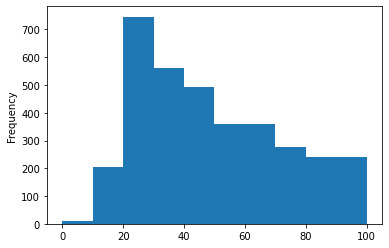

In [ ]:
#plotting the length of the reviews
print('avarege length is', df_review['lengths'].mean())

df_review['lengths'].plot.hist(range=(0,100))

In [ ]:
#printing the precentage of positive entries
print('distrubution (precentage of positive data): {} %'.format((df_review['stars'].sum(axis=0)/df_review.shape[0])*100))

distrubution (precentage of positive data): 50.0 %


In [ ]:
df_review.drop(['lengths', 'stars'], axis=1, inplace=True)
df_review.head(5)

,text,rating
0,I was extremely impressed by Mohamed Ali Taala...,5
1,"Very nice food, very nice service especially A...",5
2,Nisce service from ABHISHEK and delicious food...,5
3,Thank you so much for good delicious food and ...,5
4,"Superb venue, very friendly, welcoming, and ef...",5


<AxesSubplot:ylabel='Frequency'>

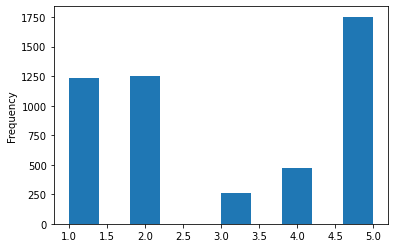

In [ ]:
#plotting the rating distrubution
figure = plt.figure()

axes = figure.add_subplot(1, 1, 1)
axes.set_ylabel('Frequancy')

# df_review['stars'].plot.hist()
df_review['rating'].plot.hist()

In [ ]:
#saving the data to be used later on
df_review.to_pickle('google_balanced.pkl')
df_review.to_csv('google_balanced.csv')
df_review.to_json('google_balanced.json',orient='records')

In [ ]:
df1 = pd.read_pickle('google_balanced.pkl')
df1.head(10)

,text,rating
0,I was extremely impressed by Mohamed Ali Taala...,5
1,"Very nice food, very nice service especially A...",5
2,Nisce service from ABHISHEK and delicious food...,5
3,Thank you so much for good delicious food and ...,5
4,"Superb venue, very friendly, welcoming, and ef...",5
5,"When we walked in this morning, my wife made a...",5
6,The visit to Al Orjouan started from the very ...,5
7,Every thing was amazing and the food was great...,5
8,The food was excellent and service also amazin...,5
9,"Nice restaurant and excellent service, the foo...",5
